# Importing Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("E:\Kaggle datasets\ground_water_quality_2018_post.csv")

In [4]:
#lat_gis=Latitude_gis,long_gis=Longitudinal_gis,gwl=ground water level,season=postmonsoon or premonsoon,pH=potential of hydrogen,E.c=Electrical conductivity,TDS=Total Dissolved solids,CO3=Carbon trioxide,HCO3=Bicarbonate,Cl=Chlorine,F=florine,NO3=Nitrates,SO4=Sulfate,Na=Sodium,K=Potassium,Mg=Magnesium,T.H=Total hardness,SAR=sodium adsorption ratio,Classification=it classify salinity and sodium content,RSC meq / L=residual sodium carbonate 

In [5]:
#this method will gives first five elements
df.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.0,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.0,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.0,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.0,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.0,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.


# Introduction

Water is essential for all the crops and livestocks as much as it is important for human beings. Crops and livestocks 
consume direct ground water, and if the quality is not up to the mark, or becomes unusable, then crops and livestocks are
affected, which may lead to crop failure or livestocks developing diseases.
By knowing the quality of the ground water, whether usable or not, the water can be put to appropriate use. Farmers can
grow specific crops which can tolerate that quality of water.

Usage=
By using these datasets one can train an ML Classification model to classify the water quality into one of the multiple
classes and know where and how the water can be used.

Data collected=
This data is collected from Telangana Open Data portal, Telangana State, India.
This data contains samples tested from various districts.

# EDA

In [6]:
#info()=This will gives information about column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

In [8]:
df

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.000000,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.000000,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.000000,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.000000,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.000000,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,375,YADADRI,S.Narayanpur,S.Narayanpur,17.144719,78.860010,25.46,postmonsoon 2018,6.95,1950,...,17.0,148.257707,2.0,160,63.206,659.893092,2.509300,C3S1,-4.379774,P.S.
370,376,YADADRI,Thurkapally,Gandamalla,17.733101,78.853831,8.39,postmonsoon 2018,7.45,2330,...,37.0,175.275418,28.0,120,111.826,759.810855,2.764652,C4S1,-4.799978,P.S.
371,377,YADADRI,Valigonda,T. somaram,17.399953,78.952290,21.21,postmonsoon 2018,7.26,1275,...,11.0,147.248057,3.0,64,38.896,319.934211,3.579245,C3S1,-0.721993,P.S.
372,378,YADADRI,Valigonda,Vemulakonda,17.347782,79.143433,4.54,postmonsoon 2018,7.27,5440,...,43.0,597.854463,6.0,424,92.378,1439.843750,6.850306,C4S2,-20.030750,P.S.


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sno,374.0,189.072193,109.473013,1.000000,94.250000,189.500000,283.750000,379.000000
lat_gis,374.0,17.701195,0.852885,15.896441,17.133500,17.632227,18.352612,19.730555
long_gis,374.0,78.790172,0.818041,77.444000,78.185767,78.583022,79.343660,80.920000
gwl,371.0,12.074340,8.533991,0.570000,5.115000,10.000000,16.575000,43.170000
pH,374.0,7.893182,0.453799,6.600000,7.580000,7.920000,8.217500,10.440000
E.C,374.0,1310.601604,761.346975,212.000000,766.250000,1173.500000,1666.250000,5440.000000
TDS,374.0,838.785027,487.262064,135.680000,490.400000,751.040000,1066.400000,3481.600000
CO3,374.0,7.058824,18.478645,0.000000,0.000000,0.000000,0.000000,100.000000
HCO3,374.0,277.676970,125.746737,30.000000,186.523010,263.842574,353.548878,970.588963
Cl,374.0,187.005348,175.897896,10.000000,60.000000,140.000000,260.000000,1500.000000


In [10]:
#isnull(),sum()=this represents information if there is null values or not and there sum

In [11]:
df.isnull().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 3
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

In [12]:
df.gwl.fillna(df.gwl.median(), inplace=True)

In [13]:
df.isnull().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 0
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

In [14]:
#Shape=gives number of columns and rows

In [15]:
df.shape

(374, 26)

# Visualisation

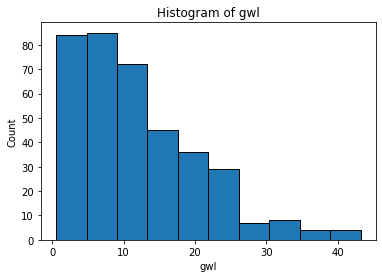

In [16]:
#Histogram for "gwl"
#represents ground water level
plt.hist(df['gwl'], bins=10, edgecolor='k')
plt.xlabel('gwl')
plt.ylabel('Count')
plt.title('Histogram of gwl')
plt.show()

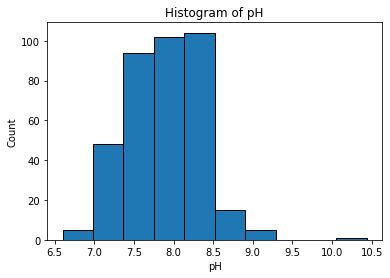

In [17]:
#Histogram for "pH"
#represents  pH
plt.hist(df['pH'], bins=10, edgecolor='k')
plt.xlabel('pH')
plt.ylabel('Count')
plt.title('Histogram of pH')
plt.show()

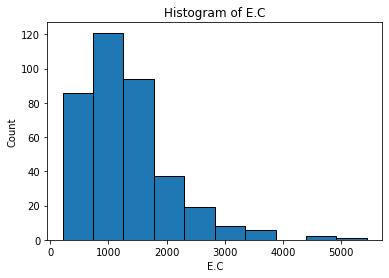

In [18]:
#Histogram for "E.C"
#represents electrical conductivity
plt.hist(df['E.C'], bins=10, edgecolor='k')
plt.xlabel('E.C')
plt.ylabel('Count')
plt.title('Histogram of E.C')
plt.show()

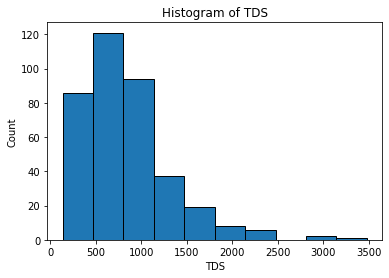

In [19]:
#Histogram for "TDS"
#reprents total dissolved solids
plt.hist(df['TDS'], bins=10, edgecolor='k')
plt.xlabel('TDS')
plt.ylabel('Count')
plt.title('Histogram of TDS')
plt.show()

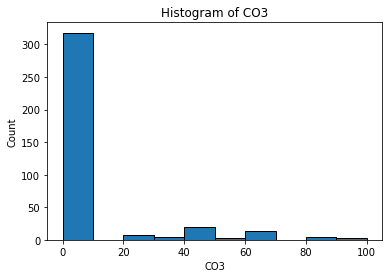

In [20]:
#Histogram for "CO3"
#represents Carbon trioxide
plt.hist(df['CO3'], bins=10, edgecolor='k')
plt.xlabel('CO3')
plt.ylabel('Count')
plt.title('Histogram of CO3')
plt.show()

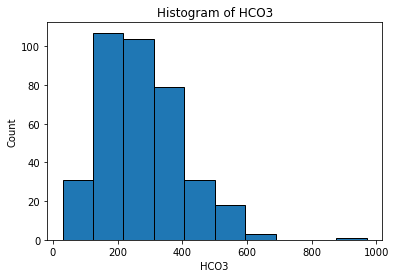

In [21]:
#Histogram for "HCO3"
#represents Bicarbonate
plt.hist(df['HCO3'], bins=10, edgecolor='k')
plt.xlabel('HCO3')
plt.ylabel('Count')
plt.title('Histogram of HCO3')
plt.show()

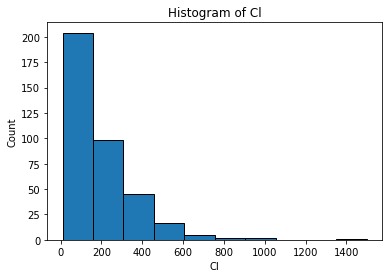

In [22]:
#Histogram for "Cl"
#represents chlorine
plt.hist(df['Cl'], bins=10, edgecolor='k')
plt.xlabel('Cl')
plt.ylabel('Count')
plt.title('Histogram of Cl')
plt.show()

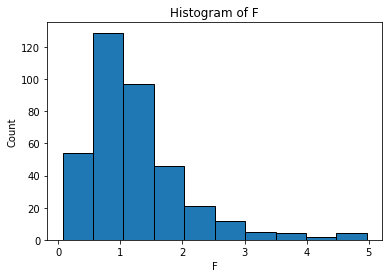

In [23]:
#Histogram for "F"
#reprents Florine
plt.hist(df['F'], bins=10, edgecolor='k')
plt.xlabel('F')
plt.ylabel('Count')
plt.title('Histogram of F')
plt.show()

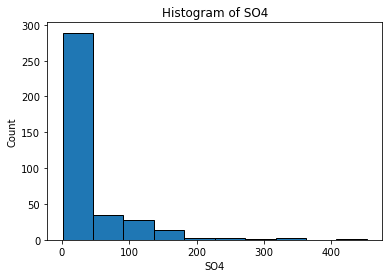

In [24]:
#Histogram for "SO4"
#reprents sulphate
plt.hist(df['SO4'], bins=10, edgecolor='k')
plt.xlabel('SO4')
plt.ylabel('Count')
plt.title('Histogram of SO4')
plt.show()

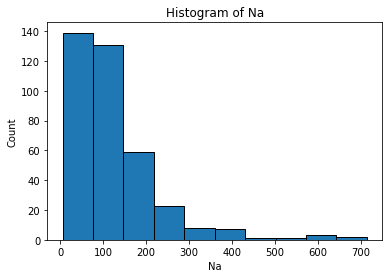

In [25]:
#Histogram for "Na"
#Represents sodium
plt.hist(df['Na'], bins=10, edgecolor='k')
plt.xlabel("Na")
plt.ylabel('Count')
plt.title('Histogram of Na')
plt.show()

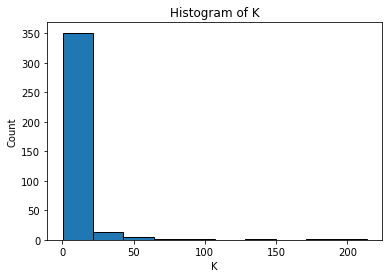

In [26]:
#Histogram for "K"
#Represents potassium
plt.hist(df['K'], bins=10, edgecolor='k')
plt.xlabel('K')
plt.ylabel('Count')
plt.title('Histogram of K')
plt.show()

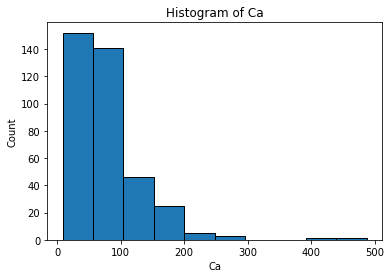

In [27]:
#Histogram for "Ca"
#represents calcium
plt.hist(df['Ca'], bins=10, edgecolor='k')
plt.xlabel('Ca')
plt.ylabel('Count')
plt.title('Histogram of Ca')
plt.show()

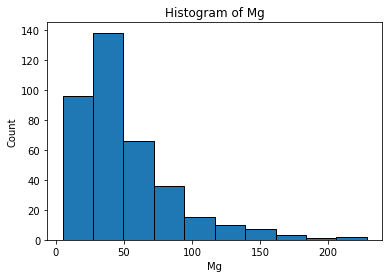

In [28]:
#Histogram for "Mg"
#represents magnesium
plt.hist(df['Mg'], bins=10, edgecolor='k')
plt.xlabel('Mg')
plt.ylabel('Count')
plt.title('Histogram of Mg')
plt.show() 

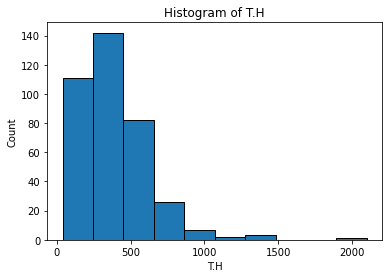

In [29]:
#Histogram for "T.H"
#represents Total Hardness
plt.hist(df['T.H'], bins=10, edgecolor='k')
plt.xlabel('T.H')
plt.ylabel('Count')
plt.title('Histogram of T.H')
plt.show()

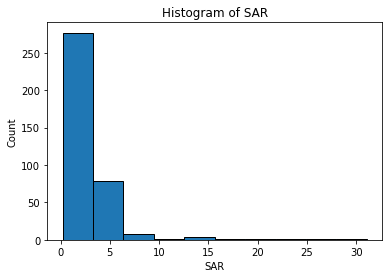

In [30]:
#Histogram for "SAR"
#represents sodium Adsorption ratio
plt.hist(df['SAR'], bins=10, edgecolor='k')
plt.xlabel('SAR')
plt.ylabel('Count')
plt.title('Histogram of SAR')
plt.show()

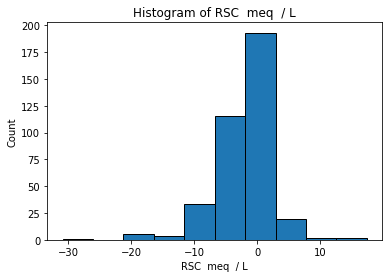

In [31]:
#Histogram for "RSC  meq  / L"
#represents Residual sodium carbonate
plt.hist(df['RSC  meq  / L'], bins=10, edgecolor='k')
plt.xlabel('RSC  meq  / L')
plt.ylabel('Count')
plt.title('Histogram of RSC  meq  / L')
plt.show()

# Pie chart

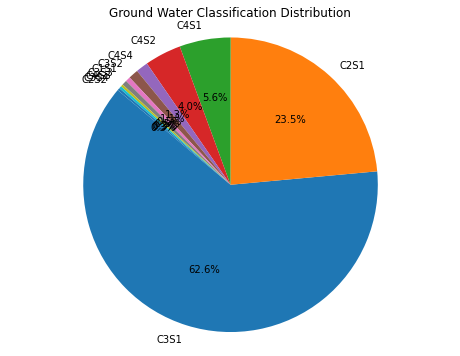

In [32]:
# Assuming 'Classification' column contains the categories for the pie chart
classification_counts = df['Classification'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Ground Water Classification Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


In [33]:
#To check unique characters in district

In [34]:
df["district"].unique()

array(['ADILABAD', 'BHADRADRI', 'BHUPALPALLY', 'HYDERABAD', 'JAGITYAL',
       'JANGAON', 'JOGULAMBA(GADWAL)', 'KAMAREDDY', 'KARIMNAGAR',
       'KHAMMAM', 'KUMURAM BHEEM', 'MAHABUBABAD', 'MAHABUBNAGAR',
       'MANCHERIAL', 'MEDAK', 'MEDCHAL', 'MULUGU', 'NAGARKURNOOL',
       'NALGONDA', 'NARAYANPET', 'NIRMAL', 'NIZAMABAD', 'PEDDAPALLY',
       'RANGAREDDY', 'SANGAREDDY', 'SIDDIPET', 'SIRCILLA', 'SURYAPET',
       'VIKARABAD', 'WANAPARTHY', 'WARANGAL (R) ', 'WARANGAL (U)',
       'YADADRI'], dtype=object)

In [35]:
#To check length of unique characters of district
len(df.district.unique())

33

In [36]:
#for loop is used to give unique characters in all columns of df
for i in df:
    print (i,":",df[i].unique())

sno : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 168 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 

  659.8930921   759.8108553  1439.84375     519.9424342 ]
SAR : [ 1.2733279   0.91316552  1.31928396  0.92815516  5.68266448  1.72144176
  2.58960825  2.13394903  6.1213078   0.44352399  2.66994838  4.3773499
  3.81683215  3.75868968  1.88792617  0.60925878  5.29096045  1.02747431
  1.98553412  1.73907486  2.01106422  0.98824908  5.68275384  1.72419885
  0.99225418  0.55003201  0.80847966  3.47989439  0.78241632  4.82173438
  2.33616299  1.80000064  1.60310083  1.52844108  2.35042897  2.20879547
  5.27688112  2.29230874  3.64061045  3.38101425  2.68619159  2.26868207
  0.56138743  6.54885667  4.39175583  5.07345276  5.86348428  1.35124706
  2.81175311  2.54297222  2.09705096  3.89719721  3.07424464  3.58661875
  1.82638737  3.11683917  4.33867875 31.0795473   1.42740624  3.37239055
  3.03835323  0.81259696 19.53750018  2.12215619  0.69697689  1.88598853
 13.50540662  6.54646294  7.85237325  1.61602859  1.8950297   0.67839013
  1.58612047  2.46104952  1.66368433  1.95601421  6.82304271 

In [37]:
#Label encoder is used to convert dataset into number
from sklearn.preprocessing import LabelEncoder

In [38]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [39]:

df.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,0,0,1,19.668300,78.524700,5.09,0,8.28,745,...,46.0,49.0,4.0,48,38.896,279.934211,1.273328,1,-1.198684,1
1,2,0,27,39,19.458888,78.350833,5.10,0,8.29,921,...,68.0,42.0,5.0,56,63.206,399.893092,0.913166,3,-3.397862,1
2,3,0,83,102,19.525555,78.512222,4.98,0,7.69,510,...,44.0,45.0,2.0,24,38.896,219.934211,1.319284,1,-0.398684,1
3,4,0,101,119,19.730555,78.640000,5.75,0,8.09,422,...,35.0,27.0,1.0,32,19.448,159.967105,0.928155,1,0.000658,1
4,5,0,206,231,19.495665,78.852654,2.15,0,8.21,2321,...,280.0,298.0,5.0,56,92.378,519.843750,5.682664,8,-4.396875,1


In [40]:
X=df.drop(["sno","Classification","Classification.1"],axis=1)

In [41]:
X.head()

,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,TDS,...,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
0,0,0,1,19.668300,78.524700,5.09,0,8.28,745,476.80,...,0.44,42.276818,46.0,49.0,4.0,48,38.896,279.934211,1.273328,-1.198684
1,0,27,39,19.458888,78.350833,5.10,0,8.29,921,589.44,...,0.56,100.659091,68.0,42.0,5.0,56,63.206,399.893092,0.913166,-3.397862
2,0,83,102,19.525555,78.512222,4.98,0,7.69,510,326.40,...,0.66,41.471545,44.0,45.0,2.0,24,38.896,219.934211,1.319284,-0.398684
3,0,101,119,19.730555,78.640000,5.75,0,8.09,422,270.08,...,0.58,10.669864,35.0,27.0,1.0,32,19.448,159.967105,0.928155,0.000658
4,0,206,231,19.495665,78.852654,2.15,0,8.21,2321,1485.44,...,2.56,128.843636,280.0,298.0,5.0,56,92.378,519.843750,5.682664,-4.396875


In [42]:
 y=df.Classification

In [43]:
y.head()

0    1
1    3
2    1
3    1
4    8
Name: Classification, dtype: int32

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    int32  
 2   mandal            374 non-null    int32  
 3   village           374 non-null    int32  
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               374 non-null    float64
 7   season            374 non-null    int32  
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

In [45]:
# standard scaler is used to scale the datasets

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X= scaler.fit_transform(X)

In [49]:
X

array([[-1.78904246, -1.71309835, -1.71043753, ..., -0.46997154,
        -0.52418242,  0.21147277],
       [-1.78904246, -1.41706229, -1.35190157, ...,  0.03671574,
        -0.64027408, -0.28829635],
       [-1.78904246, -0.80306157, -0.75748668, ..., -0.72340202,
        -0.50936934,  0.39327495],
       ...,
       [ 1.74183818,  1.48847681,  1.30881267, ..., -0.30101789,
         0.21908705,  0.31980206],
       [ 1.74183818,  1.48847681,  1.629608  , ...,  4.42930228,
         1.27345283, -4.06816551],
       [ 1.74183818,  1.60908409,  0.05393681, ...,  0.54378511,
         0.07233715, -0.13132455]])

In [50]:
#to split the dataset use train test split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
X_train.shape

(299, 23)

In [54]:
X_test.shape

(75, 23)

In [55]:
y_test.shape

(75,)

In [56]:
y_train.shape

(299,)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    int32  
 2   mandal            374 non-null    int32  
 3   village           374 non-null    int32  
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               374 non-null    float64
 7   season            374 non-null    int32  
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

# SVC

In [58]:
from sklearn.svm import SVC

In [59]:
#create a support vector classification instance
svc = SVC()

# Train the model on the training data
svc.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = svc.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8533333333333334


In [60]:
from sklearn.metrics import classification_report

y_pred1=svc.predict(X_test)
y_pred1
accuracy_score(y_test,y_pred1)
cr=(classification_report(y_test,y_pred1))
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.00      0.00      0.00         1
           3       0.80      1.00      0.89        40
           4       0.00      0.00      0.00         1
           7       0.67      0.40      0.50         5
           8       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2

    accuracy                           0.85        75
   macro avg       0.35      0.34      0.34        75
weighted avg       0.78      0.85      0.81        75



# SVC using hyper tunning parameter

In [61]:
#Define the SVC with specified hyperparameters
svc = SVC(kernel='poly')

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict the labels for the test set
y_pred2 = svc.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred2)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred2))
print(cr)

Test Accuracy: 0.8533333333333334
              precision    recall  f1-score   support

           1       0.94      0.70      0.80        23
           2       0.00      0.00      0.00         1
           3       0.80      1.00      0.89        40
           4       0.00      0.00      0.00         1
           7       0.40      0.40      0.40         5
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         0
          10       1.00      0.50      0.67         2

    accuracy                           0.79        75
   macro avg       0.39      0.32      0.34        75
weighted avg       0.77      0.79      0.76        75



# Logistic_Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
# Create a LogisticRegression instance
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = lr.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.88


In [64]:
from sklearn.metrics import classification_report

y_pred3=lr.predict(X_test)
y_pred3
accuracy_score(y_test,y_pred3)
cr=(classification_report(y_test,y_pred3))
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.00      0.00      0.00         1
           3       0.91      1.00      0.95        40
           4       0.00      0.00      0.00         1
           7       0.50      0.60      0.55         5
           8       0.00      0.00      0.00         3
          10       1.00      0.50      0.67         2

    accuracy                           0.88        75
   macro avg       0.49      0.44      0.45        75
weighted avg       0.85      0.88      0.86        75



# Random_forest_classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = rf.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9066666666666666


In [66]:
from sklearn.metrics import classification_report

y_pred4=rf.predict(X_test)
y_pred4
accuracy_score(y_test,y_pred4)
cr=(classification_report(y_test,y_pred4))
print(cr)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.00      0.00      0.00         1
           3       0.98      1.00      0.99        40
           4       0.00      0.00      0.00         1
           7       0.57      0.80      0.67         5
           8       0.00      0.00      0.00         3
          10       1.00      0.50      0.67         2

    accuracy                           0.91        75
   macro avg       0.50      0.47      0.47        75
weighted avg       0.88      0.91      0.89        75



# Random forest Classifier with hypertunning parameter

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(n_estimators=200,criterion='gini')

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = rf.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.92


In [68]:
y_pred5=rf.predict(X_test)
y_pred5
accuracy_score(y_test,y_pred5)
cr=(classification_report(y_test,y_pred5))
print(cr)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.00      0.00      0.00         1
           3       0.98      1.00      0.99        40
           4       0.00      0.00      0.00         1
           7       0.57      0.80      0.67         5
           8       0.00      0.00      0.00         3
          10       1.00      1.00      1.00         2

    accuracy                           0.92        75
   macro avg       0.50      0.54      0.52        75
weighted avg       0.88      0.92      0.90        75



# Adaboost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost classifier
boost = AdaBoostClassifier()

# Fit the model to the training data
boost.fit(X_train, y_train)

# Predict the labels for the test set
y_pred6 = boost.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred6)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred6))
print(cr)

Test Accuracy: 0.92
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.00      0.00      0.00         1
           3       0.80      1.00      0.89        40
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2

    accuracy                           0.84        75
   macro avg       0.22      0.25      0.23        75
weighted avg       0.72      0.84      0.77        75



# Adaboost with hypertunning parameter

In [70]:
# Define the AdaBoost classifier with specified hyperparameters
boost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

# Fit the model to the training data
boost.fit(X_train, y_train)

# Predict the labels for the test set
y_pred7 = boost.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred7)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred7))
print(cr)

Test Accuracy: 0.92
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.00      0.00      0.00         1
           3       0.91      1.00      0.95        40
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         5
           8       0.60      1.00      0.75         3
          10       1.00      1.00      1.00         2

    accuracy                           0.91        75
   macro avg       0.44      0.50      0.46        75
weighted avg       0.84      0.91      0.87        75



# Gradient_Boosting_classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a GradientBoostingClassifier instance
xg = GradientBoostingClassifier()

# Train the model on the training data
xg.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = xg.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.88


In [72]:
y_pred8=xg.predict(X_test)
y_pred8
accuracy_score(y_test,y_pred8)
cr=(classification_report(y_test,y_pred8))
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.00      0.00      0.00         1
           3       0.93      1.00      0.96        40
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.67      0.40      0.50         5
           8       0.33      0.33      0.33         3
           9       0.00      0.00      0.00         0
          10       1.00      0.50      0.67         2

    accuracy                           0.88        75
   macro avg       0.39      0.32      0.34        75
weighted avg       0.89      0.88      0.88        75




# Gradient boost classifier using hypertunning parameter

In [73]:
# Define the Gradient Boosting classifier with specified hyperparameters
xg = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    max_features=0.8  # Changed "colsample_bytree" to "max_features"
)

# Fit the model to the training data
xg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred9 = xg.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred9)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred9))
print(cr)

Test Accuracy: 0.88
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.00      0.00      0.00         1
           3       0.98      1.00      0.99        40
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.60      0.60      0.60         5
           8       0.33      0.33      0.33         3
          10       0.00      0.00      0.00         2

    accuracy                           0.89        75
   macro avg       0.32      0.33      0.32        75
weighted avg       0.87      0.89      0.88        75



# Descision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
# Define the Decision Tree classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred10 = model.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred10)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred10))
print(cr)

Test Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.95      0.91      0.93        23
           2       0.00      0.00      0.00         1
           3       0.98      1.00      0.99        40
           4       0.00      0.00      0.00         1
           7       0.80      0.80      0.80         5
           8       0.67      0.67      0.67         3
          10       1.00      1.00      1.00         2

    accuracy                           0.92        75
   macro avg       0.55      0.55      0.55        75
weighted avg       0.92      0.92      0.92        75



# using Hyper tuning parameter With the Decision Tree Classifier

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new DecisionTreeClassifier with the best parameters
model = DecisionTreeClassifier(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred11 = model.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred11)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred11))
print(cr)

Test Accuracy: 0.88
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.00      0.00      0.00         1
           3       0.98      1.00      0.99        40
           4       0.00      0.00      0.00         1
           7       0.50      0.60      0.55         5
           8       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2

    accuracy                           0.88        75
   macro avg       0.35      0.37      0.36        75
weighted avg       0.85      0.88      0.86        75



In [76]:
#checking all models accuracy
final_df = pd.DataFrame({'Models':['svc','svc_para','log_r','Randomforest','Randomforest_para','Adaboost','Adaboost_para','GradientBoost','GradientBoost_param','DescisionTreeClassifier','DescisionTreeClassifier_param'],
                       'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6),
                              accuracy_score(y_test,y_pred7),
                              accuracy_score(y_test,y_pred8),
                              accuracy_score(y_test,y_pred9),
                              accuracy_score(y_test,y_pred10),
                              accuracy_score(y_test,y_pred11)
    
]})
final_df

,Models,ACC
0,svc,0.853333
1,svc_para,0.786667
2,log_r,0.880000
3,Randomforest,0.906667
4,Randomforest_para,0.920000
5,Adaboost,0.840000
6,Adaboost_para,0.906667
7,GradientBoost,0.880000
8,GradientBoost_param,0.893333
9,DescisionTreeClassifier,0.920000


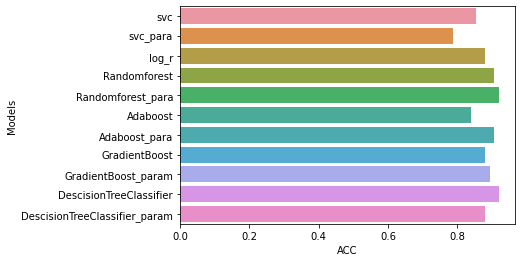

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y='Models', x='ACC', data=final_df, orient='h')
plt.show()